In [ ]:
#Manipulação
import pandas as pd
import numpy as np
#Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Fonte:
https://www.kaggle.com/danielvalyano/covid-19-vaccination-progress

In [ ]:
#Reading dataset
vaccination = pd.read_csv('/home/marina/estudos/country_vaccinations.csv')
vaccination.head()

In [ ]:
#Converting 'date' column into 'date' pandas format. Correcting missing values/replacing them with 0
vaccination['date'] = pd.to_datetime(vaccination['date'], format = '%Y-%m-%d')
vaccination = vaccination.replace([np.inf, -np.inf], np.nan)
vaccination = vaccination.fillna(0)

In [ ]:
vaccination.vaccines.unique()
columns = ['country','date','total_vaccinations','people_vaccinated','people_fully_vaccinated','people_fully_vaccinated_per_hundred','vaccines','iso_code']
latest_data = vaccination[columns].groupby('country', as_index = True).max().sort_values(by='total_vaccinations', ascending = False)
latest_data.head()

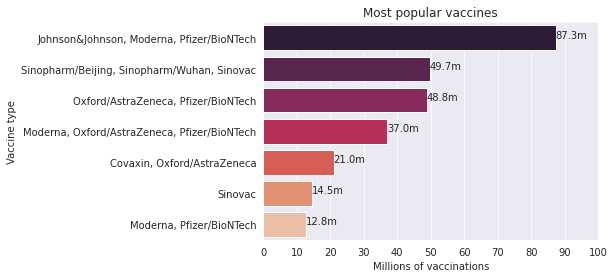

In [13]:
#Combination of most used vaccines
total_vaccines = pd.DataFrame()
vaccines = vaccination.groupby('vaccines')
for col, group in vaccines:
    total_vaccines.loc[col,"total_vaccinations"] = group["daily_vaccinations"].sum()
total_vaccines = total_vaccines.sort_values(by='total_vaccinations', ascending = False)
def show_values_on_bars(axs, h_v="v", space=0.7):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x,_y,value,ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() / 2
                value = '{:.1f}m'.format(int(p.get_width()) / 1000000)
                ax.text(_x, _y, value, ha="left")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

sns.set_style('darkgrid')
ax = sns.barplot(x = total_vaccines.iloc[:7,:]['total_vaccinations'] , y =total_vaccines.iloc[:7,:].index, palette="rocket")
ax.set_xlabel('Millions of vaccinations')
ax.set_ylabel('Vaccine type')
ax.set_title('Most popular vaccines')
plt.xticks(ticks = [0,10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000,90000000,100000000],labels= [0,10,20,30,40,50,60,70,80,90,100])
show_values_on_bars(ax,h_v = 'h', space = 0.7)
